#2020 Dataset

Mounting Google Drive, where the dataset is stored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries and dataset

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


data = pd.read_csv (r'/content/drive/MyDrive/district_level_mapping_2020.csv')

#1. Overview of the dataset

In [4]:
data.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),% A/E
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2020-2021,6245000,5493988.0,0,5493988.0,87.97
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2020-2021,1074000,1065293.0,0,1065293.0,99.19
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2020-2021,10000,0.0,0,0.0,0.00
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2020-2021,68000,12440.0,0,12440.0,18.29
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,8,कार्यालय व्यय,N,V,2020-2021,110000,51594.0,0,51594.0,46.90


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307949 entries, 0 to 307948
Data columns (total 20 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Division Code                                         294135 non-null  float64
 1   Division Description                                  294135 non-null  object 
 2   Treasury Code                                         294135 non-null  float64
 3   Treasury                                              307949 non-null  object 
 4   Grant Number                                          307949 non-null  int64  
 5   Grant Head Description                                307949 non-null  object 
 6   Major Head Code                                       307949 non-null  int64  
 7   Major Head Description                                302338 non-null  object 
 8   Scheme Code                                 

In [6]:
data.isnull().sum()

Division Code                                           13814
Division Description                                    13814
Treasury Code                                           13814
Treasury                                                    0
Grant Number                                                0
Grant Head Description                                      0
Major Head Code                                             0
Major Head Description                                   5611
Scheme Code                                                 0
Scheme Code Description                                     0
Standard Object Code                                        0
Standard Object Description                                 0
Plan / Non-Plan                                             0
Voted / Charged                                             0
fiscal_year                                                 0
Progressive Allotment                                       0
Actual P

Assuming the fact that school education does not include  University and Higher Education, Adult education and Language Development.




#2. Filtering Data with respect to School Eucation

Identifying the different Grant Heads

In [7]:
data['Grant Head Description'].unique()

array(['आबकारी विभाग', 'आवास विभाग',
       'उद्योग विभाग (लघु उद्योग एवं निर्यात प्रोत्साहन)',
       'उद्योग विभाग (खानें और खनिज)',
       'उद्योग विभाग (खादी एवं ग्रामोद्योग)',
       'उद्योग विभाग (हथकरघा उद्योग)',
       'उद्योग विभाग (भारी एवं मध्यम उद्योग)',
       'उद्योग विभाग (मुद्रण तथा लेखन सामग्री )', 'ऊर्जा विभाग',
       'कृषि तथा अन्य सम्बद्ध विभाग (औद्यानिक एवं रेशम विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (कृषि)',
       'कृषि तथा अन्य सम्बद्ध विभाग (भूमि विकास एवं जल संसाधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (पंचायती राज)',
       'कृषि तथा अन्य सम्बद्ध विभाग (दुग्धशाला विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (मत्स्य)',
       'कृषि तथा अन्य सम्बद्ध विभाग (सहकारिता)',
       'कार्मिक विभाग (प्रशिक्षण तथा अन्य व्यय)',
       'कार्मिक विभाग (लोक सेवा आयोग )', 'खाद्य तथा रसद विभाग',
       'खेल विभाग', 'गन्ना विकास विभाग (गन्ना)',
       'गन्ना विकास विभाग (चीनी उद्योग)', 'गृह विभाग (कारागार)',
       'गृह विभाग (पुलिस)', 'गृह विभाग (नागरिक सुरक्षा)',
    

We will be dealing with only two Grant Heads with respect to school education that is Elementary Education and Secondary Education


*   शिक्षा विभाग (प्राथमिक शिक्षा)
*   शिक्षा विभाग (माध्यमिक शिक्षा)



In [8]:
FilteredData = data[(data['Grant Head Description'] == 'शिक्षा विभाग (माध्यमिक शिक्षा)')| (data['Grant Head Description'] == 'शिक्षा विभाग (प्राथमिक शिक्षा)')]

In [9]:
FilteredData.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),% A/E
238650,800.0,AGRA,8.0,AGRA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2020-2021,13000000,12704148.0,0,12704148.0,97.72
238651,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2020-2021,100000000,50000000.0,0,50000000.0,50.00
238652,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2020-2021,80000000,75314625.0,0,75314625.0,94.14
238653,2000.0,KANPUR NAGAR,81.0,AURAIYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2020-2021,75000000,62659668.0,0,62659668.0,83.55
238654,NaN,NaN,NaN,AYODHYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक/अन्यसेवानिवृत्ति हितलाभ,N,V,2020-2021,80000000,33454896.0,0,33454896.0,41.82


#3. Checking for Null Values in colmuns and duplicate rows

In [10]:
FilteredData.isnull().sum()

Division Code                                           663
Division Description                                    663
Treasury Code                                           663
Treasury                                                  0
Grant Number                                              0
Grant Head Description                                    0
Major Head Code                                           0
Major Head Description                                  332
Scheme Code                                               0
Scheme Code Description                                   0
Standard Object Code                                      0
Standard Object Description                               0
Plan / Non-Plan                                           0
Voted / Charged                                           0
fiscal_year                                               0
Progressive Allotment                                     0
Actual Progressive Expenditure upto mont

Since there are no Null Values in Columns like Grant Number and Major Head Code which is essential for analysis we go ahead

In [11]:
FilteredData['Major Head Code'].value_counts()

2202    9019
2204    1102
2205     978
2071     310
8009     276
4202      56
Name: Major Head Code, dtype: int64

In [12]:
FilteredData.duplicated().sum()

593

Since it is not possible to have duplicate rows with the same expenditure within the same financial year for the exact same purpose we remove such rows.

In [13]:
FilteredData.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 4. Visualising the Dataset

In [14]:
FilteredData.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)', '% A/E'],
      dtype='object')

In [15]:
FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)', '% A/E']].describe()

,Progressive Allotment,Actual Progressive Expenditure upto month (February),Provisional Current Month Expenditure(March),Total Expenditure Upto Month (March),% A/E
count,1.114800e+04,1.114800e+04,1.114800e+04,1.114800e+04,11148.000000
mean,4.410915e+07,4.103246e+07,8.938416e+05,4.192630e+07,46.400780
std,5.156183e+08,5.427311e+08,1.671736e+07,5.477446e+08,93.372846
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2.051800e+04,3.700000e+03,0.000000e+00,5.000000e+03,19.325000
75%,6.792500e+05,4.404630e+05,0.000000e+00,4.750718e+05,90.360000
max,3.349453e+10,3.349453e+10,1.183874e+09,3.349453e+10,6818.180000


In [16]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


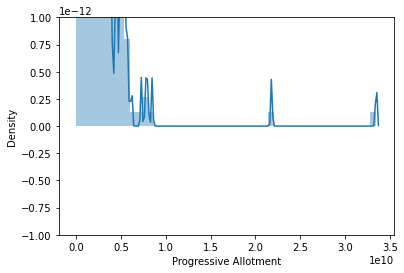

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


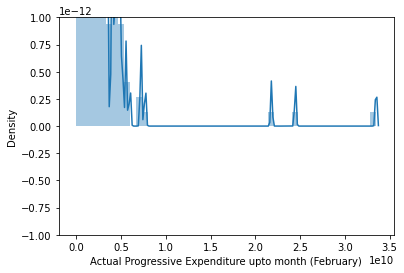

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


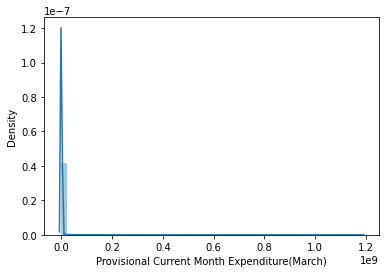

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


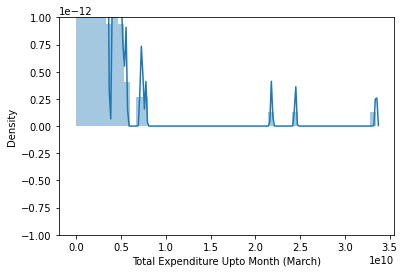

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


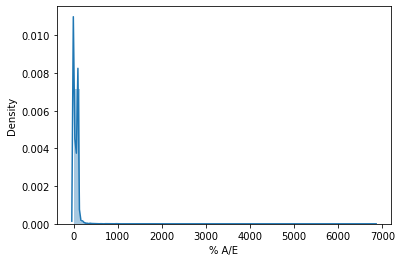

In [17]:
sb.distplot(FilteredData['Progressive Allotment'])
plt.show()
sb.distplot(FilteredData['Actual Progressive Expenditure upto month (February)'])
plt.show()
sb.distplot(FilteredData['Provisional Current Month Expenditure(March)'])
plt.show()
sb.distplot(FilteredData['Total Expenditure Upto Month (March)'])
plt.show()
sb.distplot(FilteredData['% A/E'])
plt.show()

We can see that the data is right skewed. 

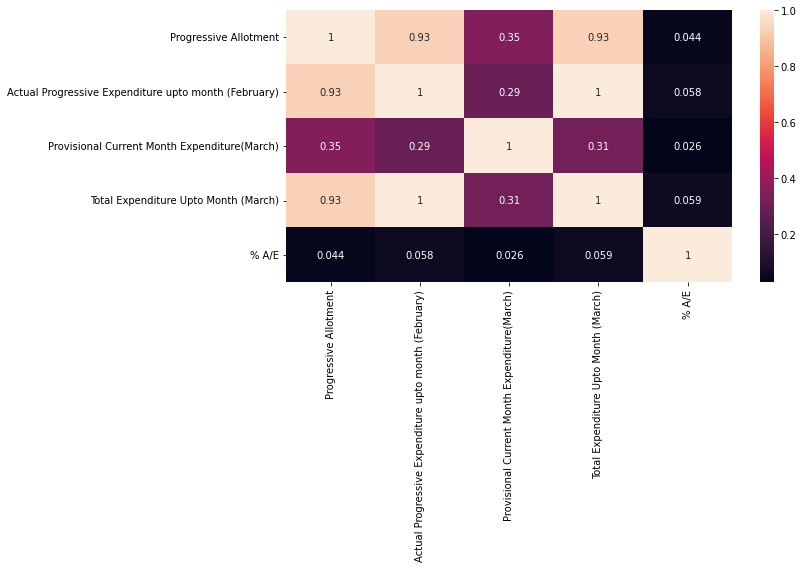

In [18]:
plt.figure (figsize=(10,5))
sb.heatmap(FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (February)',
       'Provisional Current Month Expenditure(March)',
       'Total Expenditure Upto Month (March)', '% A/E']].corr(), annot=True)
plt.show();

# Q1) Calculating the share of expenditure on school education

In [19]:
pd.DataFrame(FilteredData.groupby(['Grant Head Description','Grant Number'])['Total Expenditure Upto Month (March)'].sum())

,,Total Expenditure Upto Month (March)
Grant Head Description,Grant Number,
शिक्षा विभाग (प्राथमिक शिक्षा),71,3.798533e+11
शिक्षा विभाग (माध्यमिक शिक्षा),72,8.754104e+10


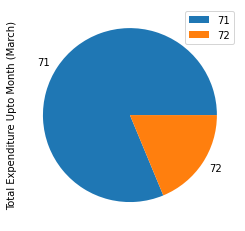

In [20]:
FilteredData.groupby(['Grant Number']).sum().plot(kind='pie', y='Total Expenditure Upto Month (March)')

# Q2) Estimating the share of capital expenditure

We know that **Major Head 4202** maps to *Capital Outlay on Education, Sports, Art and Culture*

In [21]:
Capital= FilteredData[FilteredData['Major Head Code']==4202]
pd.DataFrame(Capital['Total Expenditure Upto Month (March)'].groupby(Capital['Grant Head Description']).sum())

,Total Expenditure Upto Month (March)
Grant Head Description,
शिक्षा विभाग (प्राथमिक शिक्षा),1.314752e+09
शिक्षा विभाग (माध्यमिक शिक्षा),1.137881e+09


# Q3) Estimate the per-capita expenditure on school education in the state, and each district. 

With reference to the following [website](https://www.census2011.co.in/census/state/uttar+pradesh.html), we find the projected population for the 2021 in UP is *234,969,561*

In [22]:
percap_exp = FilteredData['Total Expenditure Upto Month (March)'].sum()/234969561
print(' The Per-capita expenditure on school education for the year 2020-21 is %.2f' %(percap_exp))

 The Per-capita expenditure on school education for the year 2020-21 is 1989.17


**Note** : Was unable to find district wise population data for the year 2020-21

#Q4) Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure

In [23]:
cap_exp = FilteredData[FilteredData['Major Head Code'] == 4202]
rev_exp = FilteredData[FilteredData['Major Head Code'] != 4202]

Captial Expenditure

In [24]:
op = pd.DataFrame((cap_exp['Total Expenditure Upto Month (March)'].groupby(cap_exp['Treasury']).sum())/cap_exp['Progressive Allotment'].groupby(cap_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
AGRA,1.000000
ALIGARH,1.000000
LUCKNOW COLL.,1.000000
LUCKNOW-JB,1.000000
MAINPURI,1.000000
MATHURA,1.000000
MEERUT SADAR,1.000000
MIRZAPUR,1.000000
MUZAFFARNAGAR,1.000000


In [27]:
op[0].value_counts()

1.000000    37
0.000000     3
0.993789     1
0.930598     1
0.869706     1
0.488520     1
0.392985     1
Name: 0, dtype: int64

It was found that **37 Distrcits** utilized 100% of their allocated funds for capital expenditure



Revenue Expenditure

In [28]:
op = pd.DataFrame((rev_exp['Total Expenditure Upto Month (March)'].groupby(rev_exp['Treasury']).sum())/rev_exp['Progressive Allotment'].groupby(rev_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
LUCKNOW COLL.,1.303690
LUCKNOW-JB,0.980773
TRY.SONBHADRA,0.966386
BULANDSHAHR,0.953890
BALLIA,0.951839
...,...
HAPUR,0.850043
SRAWASTI,0.850031
AURAIYA,0.846283


We can infer that Lucknow Coll. district ranked first in the total revenue expenditure